In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = datasets.load_breast_cancer()
num_sample, num_feature = cancer.data.shape

print('Number of samples:\t{}'.format(num_sample))
print('Number of features:\t{}'.format(num_feature))

#\t : 다음 단어로, \n : 다음 줄로

print('Feature names:\n', cancer.feature_names)

Number of samples:	569
Number of features:	30
Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
X = cancer.data
y = cancer.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

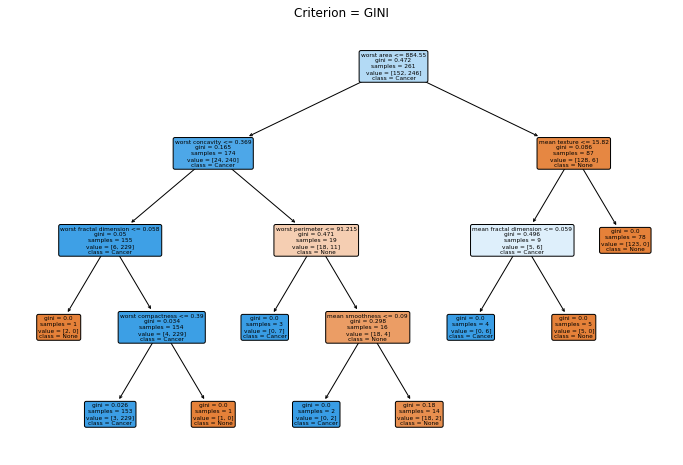

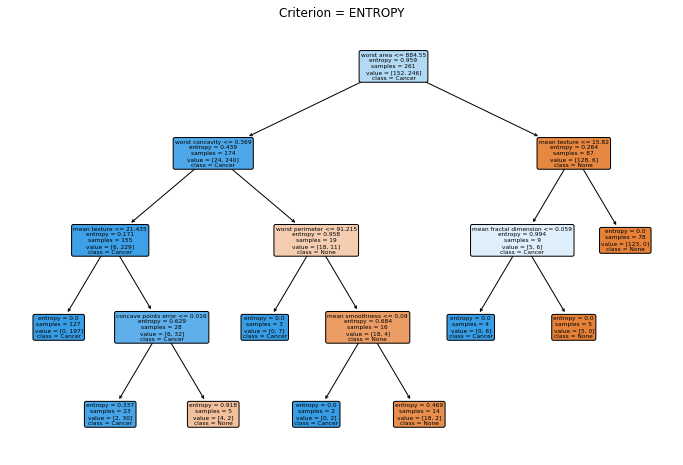

In [10]:
criterion = ['gini', 'entropy']

for i in range(2):
    clf = RandomForestClassifier(criterion=criterion[i], 
                                    max_depth=4, 
                                    random_state=1)
    clf.fit(X_train, y_train)
    fn = cancer.feature_names
    fi = np.round(clf.feature_importances_, 2)
    
    plt.figure(figsize=(12,8))
    tree.plot_tree(clf.estimators_[0],
               impurity=True, # 불순도(한 노드에 있는 서로다른 클래스)를 낮추고 노드의 온도를 높임
               filled=True,  # 노드에 색깔 칠하기
               rounded=True,
               class_names=['None', 'Cancer'],
               feature_names=list(cancer.feature_names))
    plt.title("Criterion = " + criterion[i].upper())

plt.show()

- RandomForest의 첫 번째 결정트리의 tree_plot 

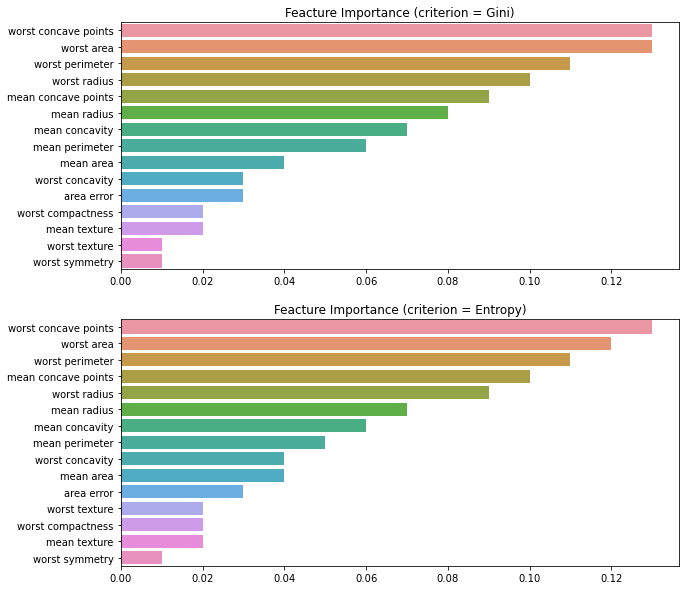

In [11]:
criterion = ['gini', 'entropy']
fi = [[range(num_feature)],[range(num_feature)]]
fig, axes = plt.subplots(2,1, figsize = (10,10), sharey = False)

for i in range(2):
    clf = RandomForestClassifier(criterion=criterion[i], 
                                    max_depth=4, 
                                    random_state=1)
    clf.fit(X_train, y_train)
    fn = cancer.feature_names
    fis = np.round(clf.feature_importances_, 2)
    fi[i] = sorted(np.round(clf.feature_importances_, 2),reverse = True)
    fns = [x for _, x in sorted(zip(fis, fn), reverse = True)]
    sns.barplot(ax = axes[i], x = fi[i][0:15], y = fns[0:15])
    axes[i].set_title("Feacture Importance (criterion = " + criterion[i].capitalize() + ")")
    axes[i].tick_params(axis='y', labelrotation=0)
    
plt.show()

- Criterion 이 Gini 또는 Entropy 일때 모두 가장 좋은 Feature Importance는 worst concave points 였다. 또한 상위 15개의 항목 모두 유사하다는 것을 알 수 있다. 그러나, 중요성이 다른 몇개의 항목들이 있는데, 예를 들어 worst areas는 Gini 일때가 더 높고, worst texture는 Entropy 일때가 중요성이 높았다. 